# SD212: Graph mining

## Project

### Title: Brazilian Chamber of Deputies analysis and the influence of the "Big center" wing

### Students: DE MENEZES LIMA Marina, OLIVEIRA MACHADO DE SOUSA Lucas, PEREIRA FERNANDES Lucas

June 2022 - Telecom Paris

The objective of this project is to learn how to extract useful information from graph data. 

Your task is the following:
* build your own graph from real data
* specify the problem(s) you would like to solve
* provide a solution
* visualize the results

## Instructions

You can work in **teams of 2 or 3**.

Fill the following variable with the names of all students of this project separated by _:



In [ ]:
name = "FERNANDES_LIMA_SOUSA"

In [ ]:
!pip install scikit-network

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.1 MB 5.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd 
import numpy as np
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
import glob
from itertools import combinations
from scipy import sparse
from sknetwork.data import Bunch, save
import pickle
from IPython.display import SVG
import sknetwork

You **must** use this name for the pickle file of your dataset and provide a link to this file:

In [ ]:
# url to your dataset, to be modified
url = 'https://nextcloud.r2.enst.fr/nextcloud/index.php/s/TXAkgs4MsDwWSrt/download/FERNANDES_LIMA_SOUSA'

Check the notebook ``my_dataset`` to generate a pickle file in appropriate format (``Bunch`` object).

You must use the following name for your notebook:

In [ ]:
# # name of your notebook
# name + '.ipynb'

## Data

Describe your data and how it has been collected (do not include the code used to extract data).

The used data describes all the votings of the Chamber of Deputies in Brazil in the period 2019-2022, indicating the vote of each deputy and his party. The data was taken from a website that provides various data on the Brazilian government (https://dadosabertos.camara.leg.br/). A *.csv* file was provided for each year, containing the votings, the votes, and other various information about each deputy. As pre-processing, we merged the files for each year into a single dataset for the entire term , dropped NaN values and filtered some columns that were not useful. At the end, we were provided with informations about 2002 votings and 591 deputies, who are not equally distributed among 36 differents parties. The possible vote for each voting is "Yes", "No" and "Abstention". It is also important to emphasize that not every candidate voted for each session, so the Votings have, in general, a different number of votes each.



## Problem

Describe the problem you want to solve (be concise).

The problem to be solved is the relationship between each deputy, his/hers votes and his/hers allies. We aim to find out if deputies actually vote in agreement with others who claim to defend the same interests. We also want to visualize, through clusters, if Brazilian politics is really divided into 3 groups "Left", "Center" and "Right", as expected. If so, we would like to verify if the deputies are really in the clusters of the groups they claim to be part of, or if they claim to be part of a group but vote according to other interests. Finally, we will also try to analyze whether there are deputies that are more important than others in terms of making the winning decisions.

In short, we want to analyze the scenario of Brazilian politics and the coherence between deputies, parties and their votes.

## Solution

Describe your solution, including the code and a visualization of the results.

To carry out our analysis, we decided to create a graph in which each node represents a deputy and the weights of the edges represent how many times two deputies voted similarly. Thus, we have a weighted undirected graph.

Our adjacency matrix will be a 591x591 square symmetric matrix (deputies as rows and also as columns). Each element $A_{i,j}$ will represent the number of times that deputies $(i,j)$ voted the same. Since almost every deputy will have at least one vote in common with each other deputy, the graph is dense (more than 98% of the possible edges have non-zero weight).

In [ ]:
!wget $url

--2022-06-22 20:29:37--  https://nextcloud.r2.enst.fr/nextcloud/index.php/s/TXAkgs4MsDwWSrt/download/FERNANDES_LIMA_SOUSA
Resolving nextcloud.r2.enst.fr (nextcloud.r2.enst.fr)... 137.194.211.140
Connecting to nextcloud.r2.enst.fr (nextcloud.r2.enst.fr)|137.194.211.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4326942 (4.1M) [application/octet-stream]
Saving to: ‘FERNANDES_LIMA_SOUSA’

FERNANDES_LIMA_SOUS 100%[===================>]   4.13M  5.17MB/s    in 0.8s    

2022-06-22 20:29:38 (5.17 MB/s) - ‘FERNANDES_LIMA_SOUSA’ saved [4326942/4326942]



In [ ]:
# you need to download data first (see the above url)
with open(name, 'br') as f:
    dataset = pickle.load(f)

In [ ]:
adjacency = dataset.adjacency
labels = dataset.labels
names = dataset.names
parties = dataset.parties

In [ ]:
sh = adjacency.get_shape()
print("Non-zero edges/Possible edges = ", adjacency.count_nonzero()/(sh[0] * (sh[1]-1)))

Non-zero edges/Possible edges =  0.9818922251856951


In [ ]:
image = svg_graph(adjacency, width=500, height=500)

In [ ]:
print("Graph visualization")
SVG(image)

### Clustering - Louvain algorithm

The first method to be applied for a better understanding of the data is called Clustering. We follow the classical approach and apply the classical Louvain algorithm to our adjacency matrix. After going through the Initialization, Maximization and Aggregation steps, the algorithm will return the found clusters, based on the weights of the edges connecting the nodes.

For our case of analysis, we can notice that two clusters were found, one being much larger than the other. Although we were expecting the appearance of 3 clusters, representing the "Left", "Right" and "Center", we can still find a coherence with the Brazilian political scenario.

When viewing the main political parties belonging to the largest cluster, we can see that the majority of deputies are in "Right" and "Center" parties. This is coherent to the analysis of Chico Marés, a brazilian journalist who specialized in political journalism. According to Marés' 2016 article, the name "Centrão" (Big Center, in english) is used to designate a group of political parties that gravitate around the government despite who's in charge, with former PMDB party (currently named MDB) always leading this process¹. As in 2016, Marés identified  the following parties as integrating the "Big Center": PP, PR, PSD, PRB, PSC, PTB, SD, PHS, PROS, PSL, PTN, PEN, PTdoB and PMDB. 

Since the Executive President of Brazil during this time period belongs to the "Right" group, we see an alliance between right-wing parties and the "Big Center" parties in the big cluster.

[1] https://www.gazetadopovo.com.br/vida-publica/centrao-renasce-na-camara-como-a-maior-forca-do-parlamento-8y6bvtcfolv1zqhyx2tix7o90/ 
Copyright © 2022, Gazeta do Povo. All rights reserved.

Deputies clusters according to their votes:


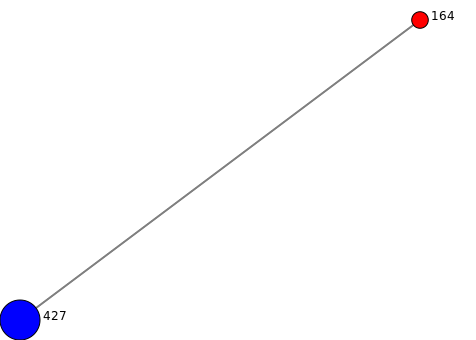

In [ ]:
from sknetwork.clustering import Louvain, modularity, bimodularity
from sknetwork.utils import bipartite2undirected, membership_matrix
from sknetwork.linalg import normalize

louvain = Louvain(modularity='Newman')
labels = louvain.fit_transform(adjacency)
labels_unique, counts = np.unique(labels, return_counts=True)

adjacency_aggregate = louvain.aggregate_

average = normalize(membership_matrix(labels).T)
labels_unique, counts = np.unique(labels, return_counts=True)
image = svg_graph(adjacency_aggregate, names=counts, labels=labels_unique,
                    display_node_weight=True, node_weights=counts, label_colors=["blue", "red", "green"])
print("Deputies clusters according to their votes:")
SVG(image)

The following dictionnary shows the number of deputies from each party in the "Left" cluster. 

The strongest parties in this cluster are PDT (Democratic Labour Party), PSB (Brazilian Socialist Party) and PT (Workers' Party), known for being left-wing parties.

In [ ]:
p, c = np.unique(parties[labels == 1], return_counts=True)
print("Number of deputies from each party in Left cluster:")
print(dict(zip(p,c)))

Number of deputies from each party in Left cluster:
{'AVANTE': 2, 'DEM': 1, 'MDB': 2, 'PCdoB': 8, 'PDT': 19, 'PL': 2, 'PODE': 1, 'PPS': 2, 'PR': 1, 'PROS': 3, 'PSB': 29, 'PSD': 9, 'PSDB': 2, 'PSOL': 9, 'PT': 59, 'PV': 3, 'REDE': 2, 'REPUBLICANOS': 2, 'S.PART.': 2, 'SOLIDARIEDADE': 2, 'UNIÃO': 4}


The dictionnary below, on the other hand, shows the number of deputies from each party in the "Right + Center" cluster.

We can see that this distribution is in accordance with Maré's analysis of the political scenario in Brazil. The parties with the highest number of deputies in the "Right + Center" cluster are MDB, PP, PR, PRB, PSD, UNIÃO (former PSL + former DEM), REPUBLICANOS (former PRB). There is a redundancy of PRB and REPUBLICANOS, since we are analysing the data between 2019 and 2022 and the party changed name in the middle of 2019.

PSDB and PL are also strong names in this cluster, and are well known in Brazil for being right-wing parties.

In [ ]:
p, c = np.unique(parties[labels == 0], return_counts=True)
print("Number of deputies from each party in Right + Center cluster:")
print(dict(zip(p,c)))

Number of deputies from each party in Right + Center cluster:
{'AVANTE': 6, 'CIDADANIA': 1, 'DEM': 2, 'MDB': 39, 'NOVO': 8, 'PATRI': 5, 'PDT': 2, 'PHS': 4, 'PL': 31, 'PMN': 1, 'PODE': 11, 'PP': 55, 'PPS': 4, 'PR': 23, 'PRB': 12, 'PROS': 6, 'PRP': 1, 'PSC': 9, 'PSD': 43, 'PSDB': 28, 'PSL': 2, 'PTB': 2, 'PV': 1, 'REPUBLICANOS': 36, 'S.PART.': 2, 'SOLIDARIEDADE': 7, 'UNIÃO': 86}


## PageRank

The highest ranking nodes in a PageRank algorithm are the ones with the strongest sum of links weights. In our case, this means that those deputies listed below are the ones that voted with the majority most of the time. As we have seen before, during this period of time the biggest cluster was composed of right-wing parties and the "Big Center", therefore it is natural that those deputies with the highest score are mostly from this group.

In [ ]:
from sknetwork.ranking import PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency)
import matplotlib.pyplot as plt

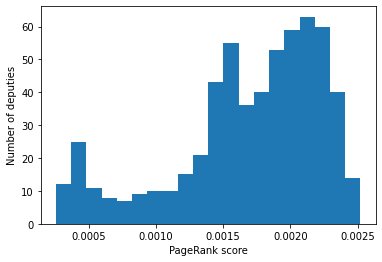

In [ ]:
plt.hist(scores, bins=20)
plt.xlabel("PageRank score")
plt.ylabel("Number of deputies")

plt.show()

In [ ]:
sorted_scores = list(np.argsort(scores))
ids = sorted_scores[-20:]
print("These are the 20 deputies who ranked highest according to the PageRank algorithm:")
for id in ids:
  print(f"{names[id].ljust(50)}{parties[id]}")

These are the 20 deputies who ranked highest according to the PageRank algorithm:
Carlos Gomes                                      PRB
Guiga Peixoto                                     UNIÃO
Adriano do Baldy                                  PP
Sargento Fahur                                    PSD
Delegado Marcelo Freitas                          UNIÃO
Bibo Nunes                                        UNIÃO
Daniel Freitas                                    PL
Julio Cesar Ribeiro                               REPUBLICANOS
General Peternelli                                UNIÃO
Marina Santos                                     REPUBLICANOS
Jose Mario Schreiner                              UNIÃO
Christiane de Souza Yared                         PP
Joaquim Passarinho                                PL
Luiz Lima                                         S.PART.
Dr. Zacharias Calil                               UNIÃO
Lauriete                                          PSC
Amaro Neto              

PageRank result - Edges are hidden to allow better visualization


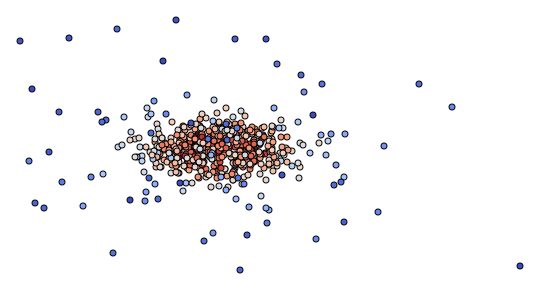

In [ ]:
image = svg_graph(adjacency, scores=scores, display_edges=False, node_size=3, width=500, height=250)
print("PageRank result - Edges are hidden to allow better visualization")
SVG(image)

## 2007-2010 Comparative Analysis

To confirm the conclusion about "Big Center"'s role in brazilian politics, we decided to repeat the analysis process for the period 2007-2010, when the president of the country was in turn from the "Left" group. In this scenario, we can see that now the largest cluster is actually made up of "Left" and "Center" politicians, confirming the "Big Center" ability to align its interests with those in power.

In [ ]:
name_2 = "votes_BR_2007-10"

In [ ]:
# url to your dataset, to be modified
url_2 = 'https://nextcloud.r2.enst.fr/nextcloud/index.php/s/CeFfFT6soijXjBA/download/votes_BR_2007-10'

In [ ]:
!wget $url_2

--2022-06-22 20:30:16--  https://nextcloud.r2.enst.fr/nextcloud/index.php/s/CeFfFT6soijXjBA/download/votes_BR_2007-10
Resolving nextcloud.r2.enst.fr (nextcloud.r2.enst.fr)... 137.194.211.140
Connecting to nextcloud.r2.enst.fr (nextcloud.r2.enst.fr)|137.194.211.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4495924 (4.3M) [application/octet-stream]
Saving to: ‘votes_BR_2007-10’

votes_BR_2007-10    100%[===================>]   4.29M  5.30MB/s    in 0.8s    

2022-06-22 20:30:18 (5.30 MB/s) - ‘votes_BR_2007-10’ saved [4495924/4495924]



In [ ]:
# you need to download data first (see the above url)
with open(name_2, 'br') as f:
    dataset = pickle.load(f)

In [ ]:
adjacency = dataset.adjacency
labels = dataset.labels
names = dataset.names
parties = dataset.parties

In [ ]:
image = svg_graph(adjacency, width=500, height=500)

Deputies clusters according to their votes (2007-2010):


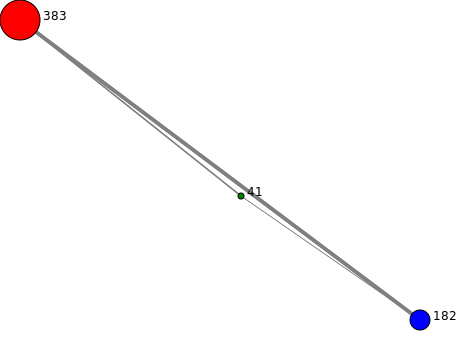

In [ ]:
louvain = Louvain(modularity='Newman')
labels = louvain.fit_transform(adjacency)
labels_unique, counts = np.unique(labels, return_counts=True)

adjacency_aggregate = louvain.aggregate_

average = normalize(membership_matrix(labels).T)
labels_unique, counts = np.unique(labels, return_counts=True)
image = svg_graph(adjacency_aggregate, names=counts, labels=labels_unique,
                    display_node_weight=True, node_weights=counts, label_colors=["red", "blue", "green"])

print("Deputies clusters according to their votes (2007-2010):")
SVG(image)


We see below that in the years when the Executive President was a left-wing president, the biggest cluster is composed of left parties, most notably PT (Workers' Party), PSB (Brazilian Socialist Party), PV (Green Party), PDT (Democratic Labour Party), and "Big Center" parties such as the aforementioned PP, PMDB, PR, PTB and PSC.

In [ ]:
p, c = np.unique(parties[labels == 0], return_counts=True)
print("Number of deputies from each party in Left+Center cluster:")
print(dict(zip(p,c)))

Number of deputies from each party in Left+Center cluster:
{'PCdoB': 13, 'PDT': 23, 'PFL': 6, 'PHS': 4, 'PMDB': 83, 'PMN': 3, 'PP': 40, 'PPS': 6, 'PR': 34, 'PRB': 7, 'PSB': 23, 'PSC': 11, 'PSDB': 5, 'PT': 80, 'PTB': 25, 'PTC': 3, 'PTdoB': 1, 'PV': 13, 'S.PART.': 3}


The second biggest cluster was composed of traditionally right-wing parties such as PSDB, mentioned before, DEM (currently UNIÃO, mentioned before as well) and PFL (again we have a redundancy: PFL was created in 1985 and changed its name to Democratas, or DEM, in 2007).

In [ ]:
p, c = np.unique(parties[labels == 1], return_counts=True)
print("Number of deputies from each party in Right cluster:")
print(dict(zip(p,c)))

Number of deputies from each party in Right cluster:
{'DEM': 15, 'PDT': 1, 'PFL': 51, 'PMDB': 7, 'PP': 5, 'PPS': 17, 'PR': 5, 'PSB': 2, 'PSDB': 69, 'PSOL': 4, 'PTB': 2, 'PTC': 2, 'PV': 1, 'S.PART.': 1}


The third and last cluster can be defined as a small group of deputies who dissonate from their fellow party members.

In [ ]:
p, c = np.unique(parties[labels == 2], return_counts=True)
print("Number of deputies from each party in ??? cluster")
print(dict(zip(p,c)))

Number of deputies from each party in ??? cluster
{'PDT': 2, 'PMDB': 12, 'PP': 1, 'PR': 5, 'PRB': 1, 'PSB': 3, 'PSC': 1, 'PT': 10, 'PTB': 6}


Finally, we can conclude that brazilian politics are heavily polarized between left-wing and right-wing, and notably the "Big Center" parties have a fundamental role in the Chamber of Deputies by making alliances to whoever is in power. 